In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import spacy
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
props=['Sex', 'Age', 'Education',
       'Income']
char=['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk']

In [9]:
for i in props:
  print('------------')
  print(df[i].value_counts())

------------
0.0    141974
1.0    111706
Name: Sex, dtype: int64
------------
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64
------------
6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: Education, dtype: int64
------------
8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64


In [12]:
for i in char:
  print(i)
  print('------------')
  print(df[i].value_counts())

Diabetes_binary
------------
0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64
HighBP
------------
0.0    144851
1.0    108829
Name: HighBP, dtype: int64
HighChol
------------
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
CholCheck
------------
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
BMI
------------
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
Smoker
------------
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
Stroke
------------
0.0    243388
1.0     10292
Name: Stroke, dtype: int64
HeartDiseaseorAttack
------------
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64
PhysActivity
------------
1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64
Fruits
------------
1.0    160898
0.0     92782
Name: Fruits, dtype: int64
Veggies
------------
1.0    205841
0.0     47839
N

In [13]:
df['BMI'].unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [18]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(np.array(df['BMI']).reshape(-1, 1))

In [23]:
df['standard_BMI']=standardized_data

In [24]:
df['standard_BMI'].unique()

array([ 1.75793567, -0.51180614, -0.05785778, -0.2091739 , -0.66312226,
        0.24477446,  0.85003895, -0.36049002,  0.69872283, -1.11707062,
       -0.81443838, -0.9657545 ,  1.45530343,  0.54740671,  1.30398731,
        0.39609058,  0.09345834, -1.26838675,  1.00135507,  2.51451628,
        1.60661955, -1.41970287,  2.81714852, -1.57101899,  1.15267119,
        2.21188404,  4.02767749,  3.11978076,  2.06056792, -1.72233511,
       -1.87365123,  1.90925179,  2.36320016,  3.27109688,  4.63294197,
        2.96846464,  3.57372912,  2.6658324 ,  3.87636137,  4.33030973,
        3.72504525, -2.17628347, -2.02496735,  3.422413  ,  4.48162585,
        5.23820645,  4.93557421,  4.17899361,  6.90268379,  5.08689033,
        5.38952258,  5.69215482,  6.75136766,  8.56716112,  4.78425809,
        5.84347094,  5.5408387 ,  6.2974193 ,  8.11321275,  7.65926439,
        9.62637396,  5.99478706,  6.60005154,  9.02110948, 10.23163845,
       -2.32759959,  7.96189663,  6.44873542,  7.05399991, -2.47

In [25]:
char=['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'standard_BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk']

In [26]:
dfc=df.loc[:,char]

In [27]:
dfc.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'standard_BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

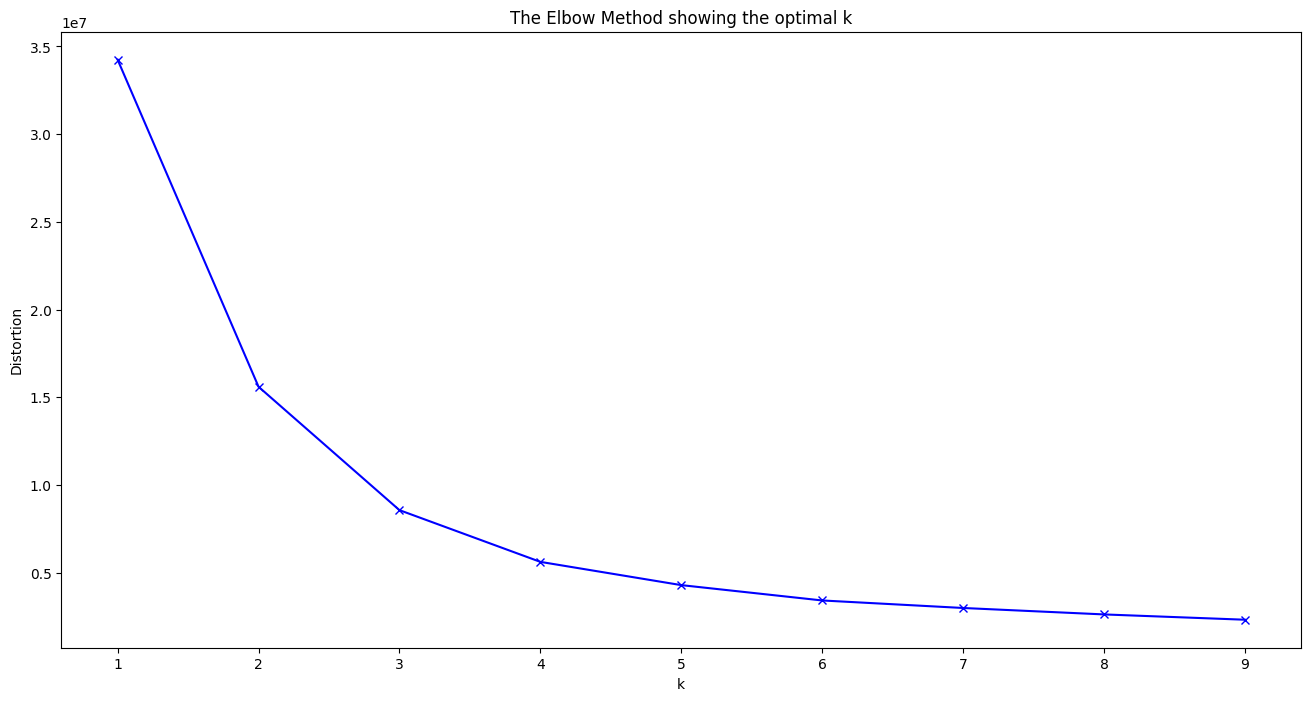

In [28]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfc)
    distortions.append(kmeanModel.inertia_)

distortions = [d-5000 if i>0 else d for i,d in enumerate(distortions)]

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [44]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(dfc)

Kmean.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 0.11893575,  0.4023915 ,  0.40338608,  0.96076578, -0.04252146,
         0.42204911,  0.03042249,  0.07621825,  0.78967525,  0.64257619,
         0.82052078,  0.05812677,  0.95211607,  0.0683111 ,  2.31767655,
         1.95670195,  1.26641285,  0.10577667],
       [ 0.28332698,  0.61685093,  0.57049816,  0.97610878,  0.30017916,
         0.59226077,  0.11221248,  0.22102554,  0.52265218,  0.57551785,
         0.74717245,  0.04257212,  0.94354429,  0.19618122,  3.87892362,
        11.85430169, 25.24872919,  0.60906723]])

In [45]:
df['cluster'] = Kmean.labels_

In [46]:
df['cluster'].unique()

array([1, 0], dtype=int32)

In [47]:
df['cluster']=df['cluster'].apply(lambda x: 'Cluster 2' if x==1 else 'Cluster 1')
df['cluster'].value_counts()

Cluster 1    222212
Cluster 2     31468
Name: cluster, dtype: int64

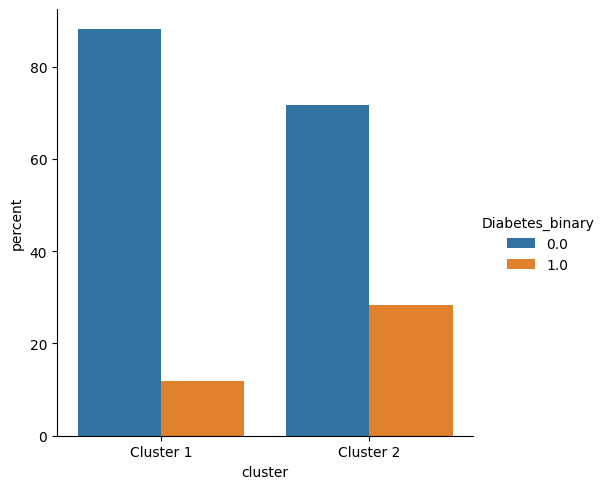

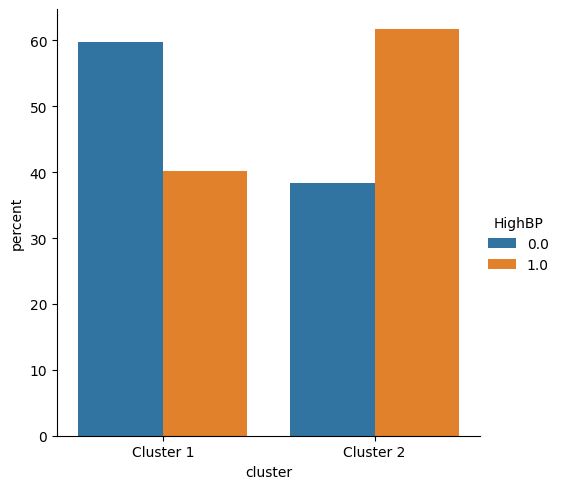

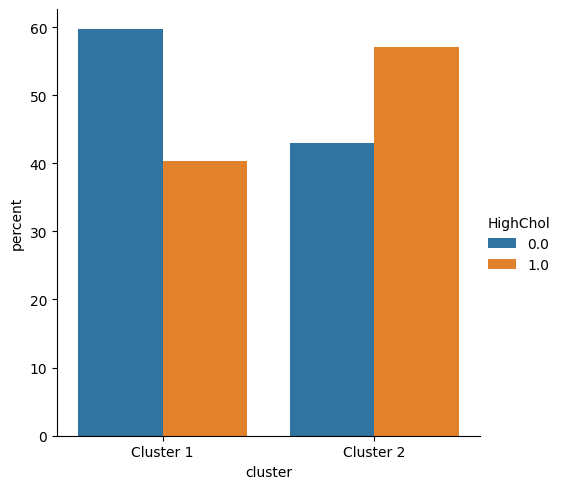

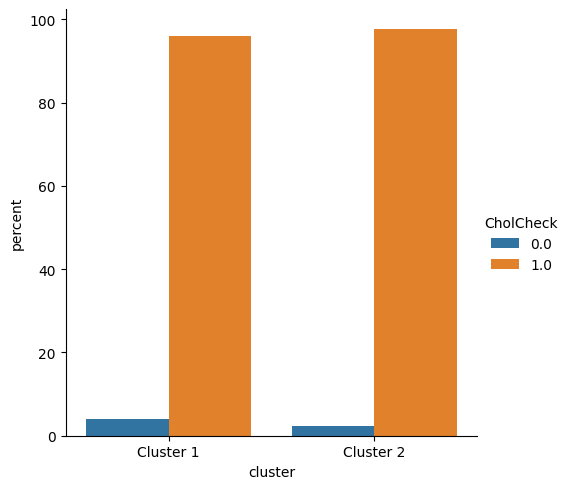

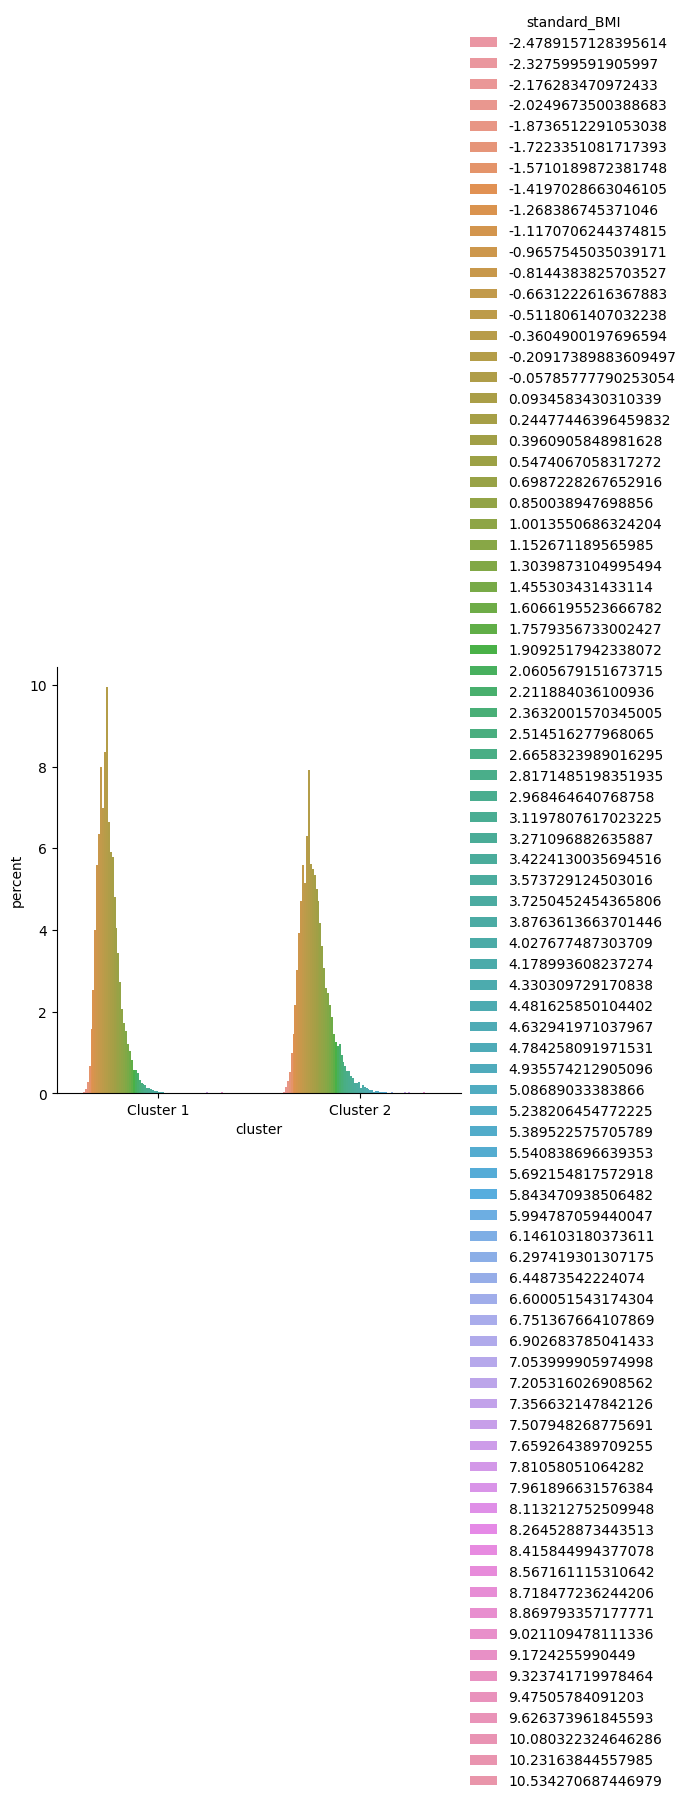

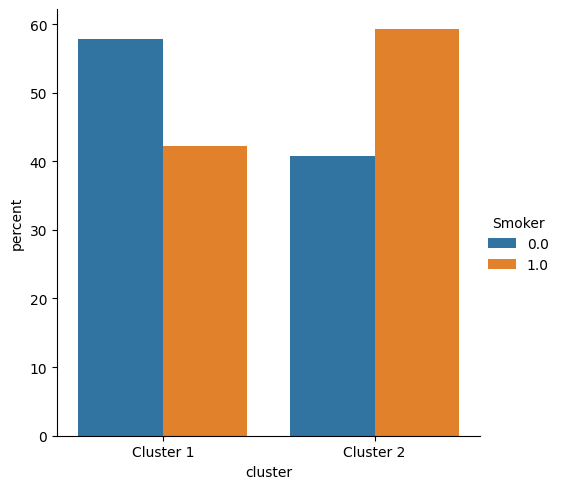

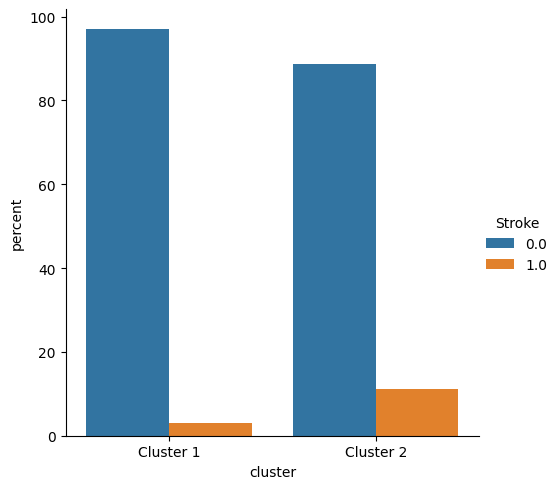

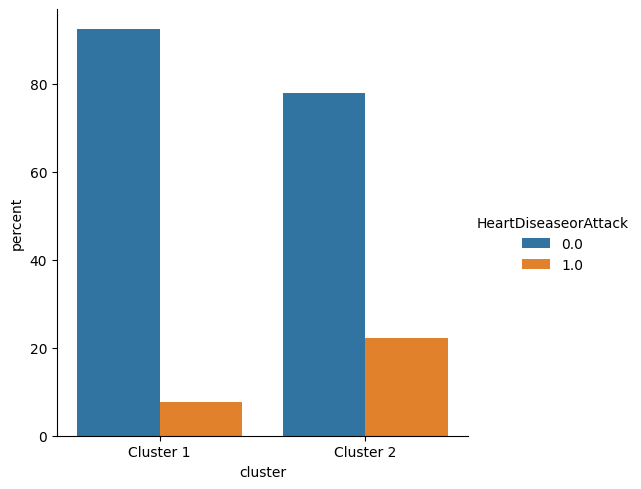

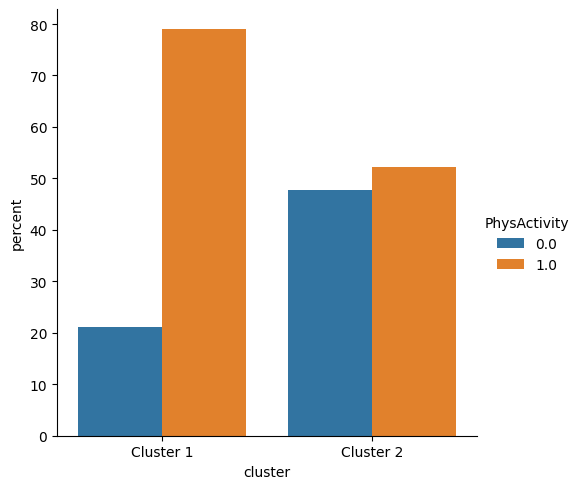

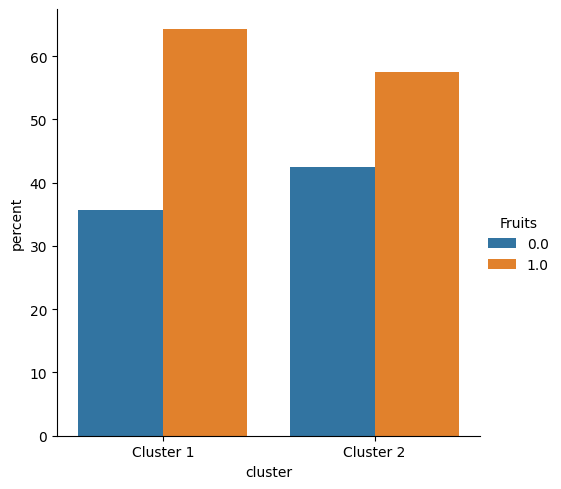

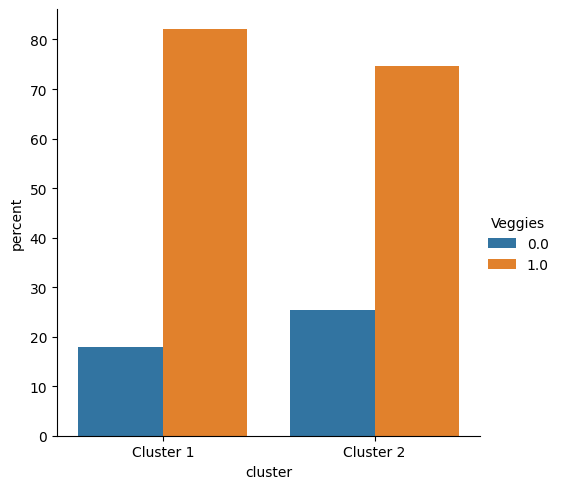

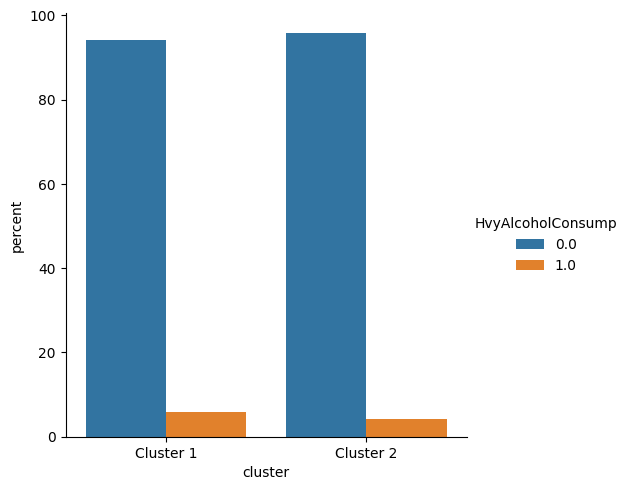

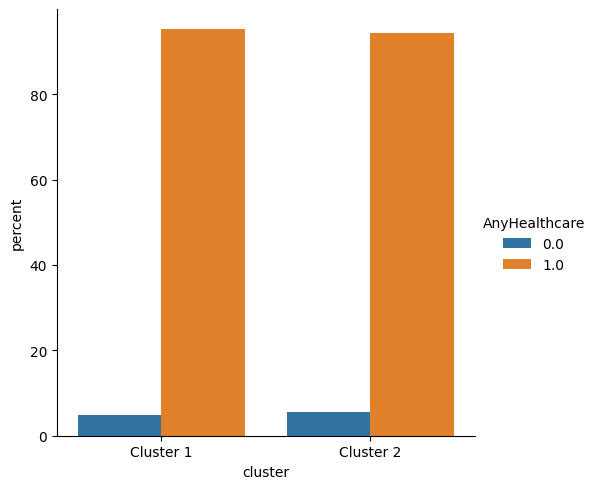

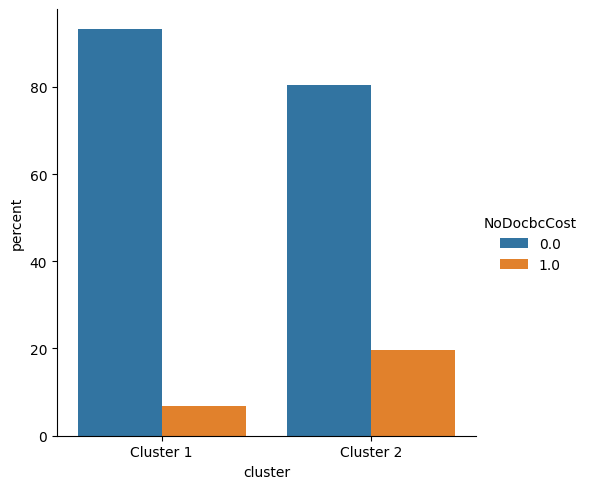

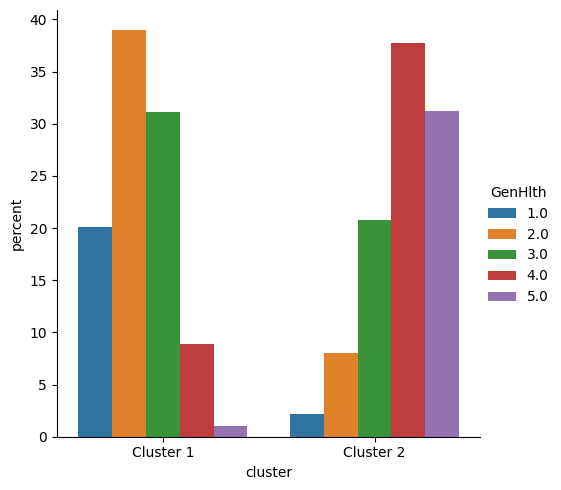

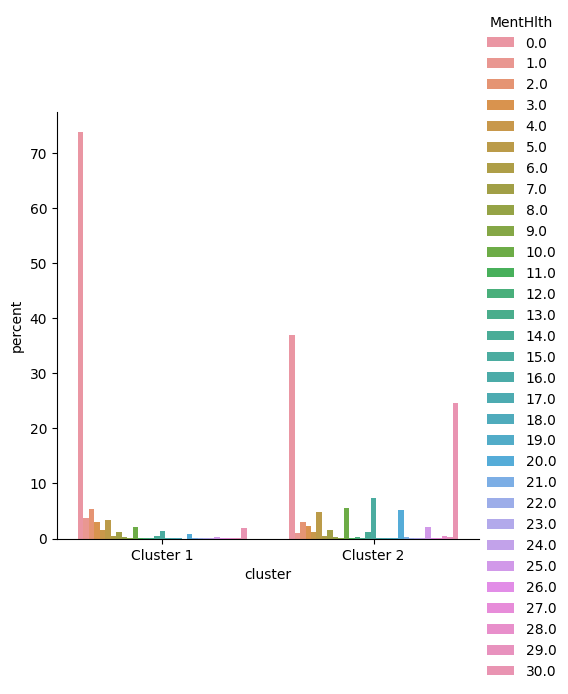

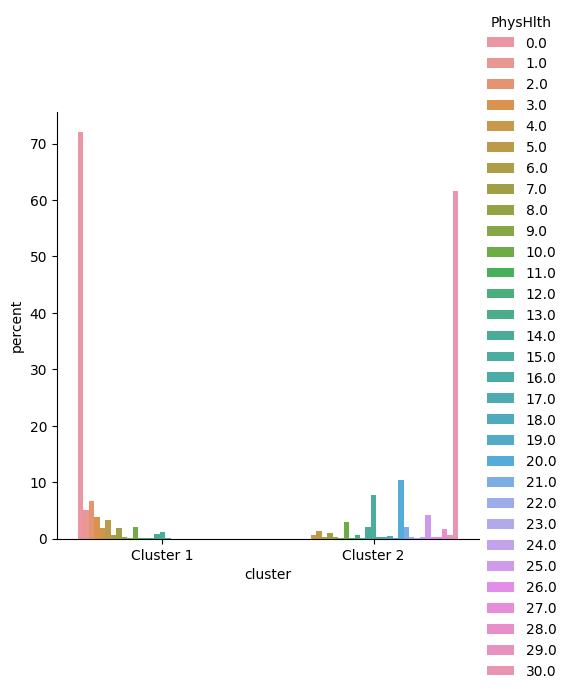

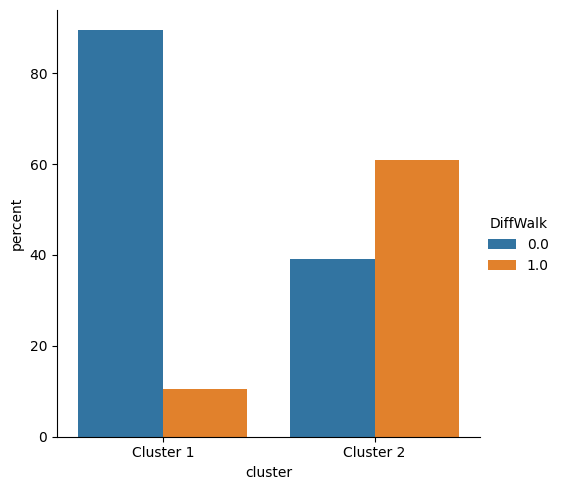

In [63]:
for i in char:
  y,x = i, 'cluster'

  df1 = df.groupby(x)[y].value_counts(normalize=True)
  df1 = df1.mul(100)
  df1 = df1.rename('percent').reset_index()

  g = sns.catplot(x=x,y='percent',hue=i,kind='bar',data=df1)



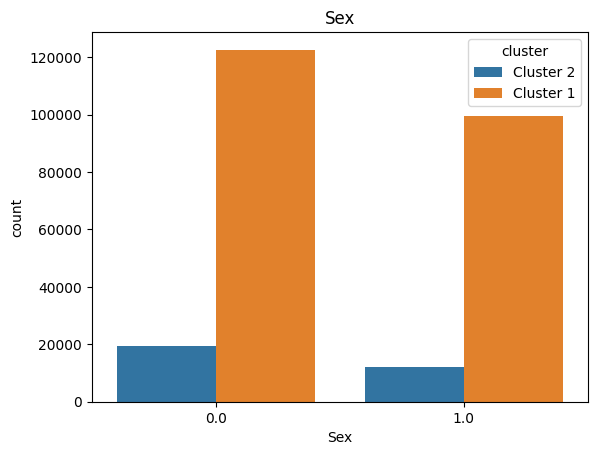

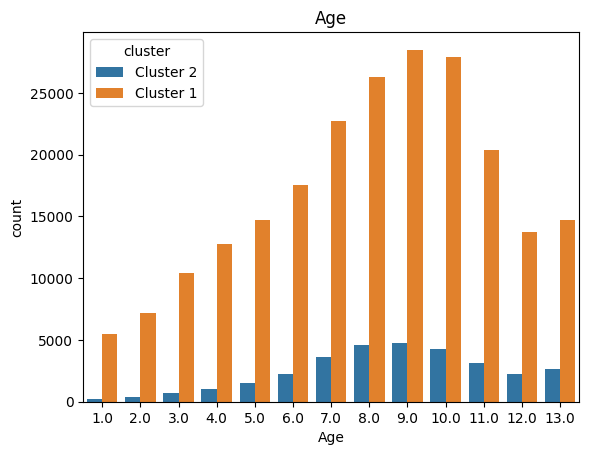

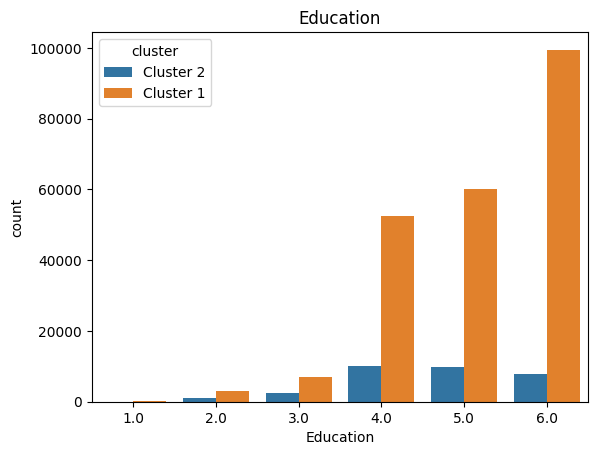

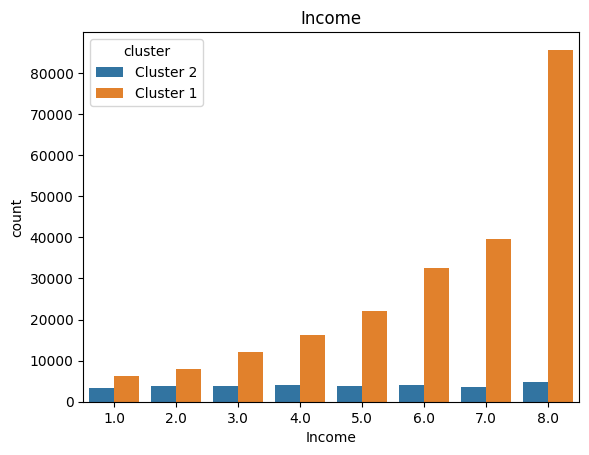

In [56]:
for j in props:
        plt.title(j)
        sns.countplot(data=df, x=j, hue="cluster")
        plt.show()